In [1]:
# web scraping: é uma técnica de coleta de dados automatizada que extrai informações de páginas web. Essa técnica é fundamental para a análise de
# dados, pois, permite obter grandes volumes de dados que nãp estão disponiveis
# em formatos estruturados, como planilhas ou base de dados.

# Vamos usar nesse projeto 2 frameworks em python

# Request: É uma biblioteca HTTP elegante e simples para python

# Beautiful Soup: É uma biblioteca python para extrair dados de 
# arquivos HTML e XML.

# frameworks: É uma estrutura pré-construida que fornece um conjunto 
# de ferramentas, bibliotecas e convenções para agilizar o desenvolvimento
# de software. Ele serve como um ponto de partida, oferecendo uma base sólida
# e organizada para que os desenvolvedores possam construir aplicações de forma
# mais rápida e eficiente. Em resumo, os frameworks são ferramentas poderosas que podem acelerar o desenvolvimento de software e melhorar a qualidade do código. Ao escolher o framework certo, você pode aumentar sua produtividade e criar aplicações mais robustas e escaláveis.

# Dados Estruturados: Os dados estruturados são aqueles organizados e 
# representados com uma estrutura rigida, a qual foi previamente 
# planejada para armazena-los. 
# Exemplos de dados estruturados: Planilhas, Tabelas


# Dados semiestruturados: Semiestruturados não possuem estrutura totalmente
# rigida nem estrutura totalmente flexivel, sendo uma representação heterogenea

# Exemplo de dados semisestruturados: Json e XLM

# Dados não estruturados: Não estruturados possuem uma estrutura totalmente
# inversa dos dados estruturados, sendo flexiveis e dinâmicos ou, até mesmo,
# sem qualquer estrutura




# import dos pacotes

# import do request

# framework que ira trabalhar com as requisições HTTP
import requests

# Irá minerar os dados das páginas web 
from bs4 import BeautifulSoup

# Serve para análisar e manipular dados
import pandas as pd

# Possui uma grande variedade de gráficos
import seaborn as sns

# Constrói  e manipula gráficos
import matplotlib.pyplot as plt

# Serve para criar gráficos interativos
import plotly.graph_objects as go

In [2]:
# Acessando a página

# URL para buscar os dados
site = 'https://en.wikipedia.org/wiki/List_of_reported_UFO_sightings'

# Carregando os dados da página usando o request

pagina = requests.get(site)

In [3]:
# O 200 do resultado signfica que a requisição http foi realizada com sucesso.

# 200 OK: Significa que a requisição feita pelo cliente (seu navegador) foi
# recebida, compreendida e atendida pelo servidor. O recurso solicitado foi
# encontrado e enviado ao cliente.
pagina

<Response [200]>

In [4]:
# Verificando o tipo da variável pagina (variável que ira carregar os dados da
# página)

type(pagina)

requests.models.Response

In [5]:
pagina.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of reported UFO sightings - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-

In [6]:
# Vai interpretar o arquivo html
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [7]:
# Verificando o tipo da variável
type (coleta)

bs4.BeautifulSoup

In [8]:
coleta

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of reported UFO sightings - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clie

In [9]:
# Agora que ja inspecionamos o sistema (no site do link utilizado), vamos acessar a tag que possui os dados que queremos acessar

coleta.tbody

<tbody><tr>
<th>Date</th>
<th>Name</th>
<th>Location</th>
<th>Description
</th></tr>
<tr>
<td data-sort-value="-1450">c. 1450 BC
</td>
<td><a href="/wiki/Temple_of_Amun,_Jebel_Barkal" title="Temple of Amun, Jebel Barkal">Thutmose III Jebel Barkal Stele</a>
</td>
<td><span style="display:none">•</span><a href="/wiki/Africa" title="Africa">AF</a><span style="display:none">AF</span>, <a href="/wiki/Ancient_Egypt" title="Ancient Egypt">Ancient Egypt</a>; <a href="/wiki/Jebel_Barkal" title="Jebel Barkal">Jebel Barkal</a>, <a href="/wiki/Lower_Egypt" title="Lower Egypt">Lower Egypt</a>
</td>
<td>After conquering the ancient Nubian city of <a href="/wiki/Napata" title="Napata">Napata</a>, <a href="/wiki/Thutmose_III" title="Thutmose III">Thutmose III</a> had a <a href="/wiki/Stele" title="Stele">stele</a> erected at the <a href="/wiki/Temple_of_Amun,_Jebel_Barkal" title="Temple of Amun, Jebel Barkal">Temple of Amun</a>, beneath the <a href="/wiki/Jebel_Barkal" title="Jebel Barkal">Jebel Barka

In [19]:
# Também é possivel localizar as tags usando o beautifuSoup

coleta.find_all('table')

[<table class="wikitable sortable mw-datatable sticky-header sort-under-center">
 <tbody><tr>
 <th>Date</th>
 <th>Name</th>
 <th>Location</th>
 <th>Description
 </th></tr>
 <tr>
 <td data-sort-value="-1450">c. 1450 BC
 </td>
 <td><a href="/wiki/Temple_of_Amun,_Jebel_Barkal" title="Temple of Amun, Jebel Barkal">Thutmose III Jebel Barkal Stele</a>
 </td>
 <td><span style="display:none">•</span><a href="/wiki/Africa" title="Africa">AF</a><span style="display:none">AF</span>, <a href="/wiki/Ancient_Egypt" title="Ancient Egypt">Ancient Egypt</a>; <a href="/wiki/Jebel_Barkal" title="Jebel Barkal">Jebel Barkal</a>, <a href="/wiki/Lower_Egypt" title="Lower Egypt">Lower Egypt</a>
 </td>
 <td>After conquering the ancient Nubian city of <a href="/wiki/Napata" title="Napata">Napata</a>, <a href="/wiki/Thutmose_III" title="Thutmose III">Thutmose III</a> had a <a href="/wiki/Stele" title="Stele">stele</a> erected at the <a href="/wiki/Temple_of_Amun,_Jebel_Barkal" title="Temple of Amun, Jebel Barkal

In [20]:
# Agora vamos atribuir essa procura a uma variável para iniciarmos o trabalho com tabelas

Tabelas = coleta.find_all('table')

# Vamos imprimir a quantidade de valores da tag tbody encontrada
print('foi localizado ', len(Tabelas), ' tabelas')

foi localizado  32  tabelas


In [21]:
# verificando o type da variável tabelas, até onde entendi, ele virá uma 
# espécie de lista

type(Tabelas)

bs4.element.ResultSet

In [26]:
# Vamos acessar a posição 0 da "lista" tabelas. Agpra basicamente,
# cada indice da lista é uma tabela diferente do site.

Tabelas[0]

<table class="wikitable sortable mw-datatable sticky-header sort-under-center">
<tbody><tr>
<th>Date</th>
<th>Name</th>
<th>Location</th>
<th>Description
</th></tr>
<tr>
<td data-sort-value="-1450">c. 1450 BC
</td>
<td><a href="/wiki/Temple_of_Amun,_Jebel_Barkal" title="Temple of Amun, Jebel Barkal">Thutmose III Jebel Barkal Stele</a>
</td>
<td><span style="display:none">•</span><a href="/wiki/Africa" title="Africa">AF</a><span style="display:none">AF</span>, <a href="/wiki/Ancient_Egypt" title="Ancient Egypt">Ancient Egypt</a>; <a href="/wiki/Jebel_Barkal" title="Jebel Barkal">Jebel Barkal</a>, <a href="/wiki/Lower_Egypt" title="Lower Egypt">Lower Egypt</a>
</td>
<td>After conquering the ancient Nubian city of <a href="/wiki/Napata" title="Napata">Napata</a>, <a href="/wiki/Thutmose_III" title="Thutmose III">Thutmose III</a> had a <a href="/wiki/Stele" title="Stele">stele</a> erected at the <a href="/wiki/Temple_of_Amun,_Jebel_Barkal" title="Temple of Amun, Jebel Barkal">Temple of Amu

In [ ]:
# Dependência que permitirá a utilização do método pd.read_html para extrair tabelas de HTML.
pip install lxml

In [2]:


site_mulher ='https://pt.wikipedia.org/wiki/Viol%C3%AAncia_dom%C3%A9stica_no_Brasil'

# Como a minha tabela é diferente da tabela utilizada na aula, vou usar o pandas para acessar a tabela do site escolhido e realizar uma análise
tabelas_site = pd.read_html(site_mulher)



In [15]:
# Quantidade de tabelas encontradas


print("Quantidade de tabelas encontradas: ", len(tabelas_site))

Quantidade de tabelas encontradas:  13


In [16]:
# Os gráficos começam a partir do indice 10, os demais indices não
# são tabelas, ainda não sei o por que dele contar tags que não são tabelas
tabelas_site[10].head()

UF Denúncias registradas no Ligue 180                \
                    UF                      Março de 2019 Março de 2020   
0                 Acre                                 18            16   
1          Mato Grosso                                 95           104   
2                 Pará                                219           133   
3  Rio Grande do Norte                                162           108   
4    Rio Grande do Sul                                446           447   

                
  Variação (%)  
0         -111  
1           95  
2         -393  
3         -333  
4            2

In [17]:
# Verificando os head das tabelas
# Vamos iterar as 10 posições utilizando um for com o intuito de verificar 
# os heads de cada tabela
# Indice: Representa as posições das tabelas no site
# Tabela: Irá representar as tabelas e seus conteúdos
# Tabelas_site[1:10]: Irá representar o intervalo que deve ser análisado
for indice, tabela in enumerate(tabelas_site[1:10]):
    
    # Ira mostrar todas as linhas das tabelas
    pd.set_option('display.max_rows', None)

    # Impressão das posições
    print("Head da tabela da ", indice + 1, "° posição")
    
    # Impressão dos valores da tabela
    print(tabela.head())

Head da tabela da  1 ° posição
         Ano  Número de homicídios femininos  % da população  Ano_extraido  \
0 1980-01-01                            1353              23          1980   
1 1990-01-01                            2585              35          1990   
2 2000-01-01                            3743              37          2000   
3 2010-01-01                            4465              46          2010   
4 2013-01-01                            4762              48          2013   

   porcentagem_populacao  
0                    2.3  
1                    3.5  
2                    3.7  
3                    4.6  
4                    4.8  
Head da tabela da  2 ° posição
                          Números                                           
                             Fase Mulheres  Homens Não identificados   Total
0            Crianças (0-11 anos)   20 707  17 411               130  38 248
1  Adolescentes (de 12 a 17 anos)   24 708  13 248                 9  37 965

In [3]:

# O bloco de código irá percorrer a tabela de site
# com o intuito de verificar a quantidade de valores
# nulos que podem estar presentes em cada tabela.

# indice: Irá representar os indices das tabelas
# Tabela: Irá representar a tabela e seus coteudos
# enumerate: Ira numerar as tabelas
for indice, tabela in enumerate(tabelas_site[1:10]):
    
    # Print das posições das tabelas
    print('Valores nulos da tabela da ', indice + 1, "° posição")
    
    # Print da quantidade de valores nulos em cada coluna da tabela
    print(tabela.isnull().sum())

    
    

Valores nulos da tabela da  1 ° posição
Ano                               0
Número de homicídios femininos    0
% da população                    0
dtype: int64
Valores nulos da tabela da  2 ° posição
Números  Fase                 0
         Mulheres             0
         Homens               0
         Não identificados    0
         Total                0
dtype: int64
Valores nulos da tabela da  3 ° posição
Unnamed: 0                                   0
Homicídio (vítimas do sexo feminino)         0
Feminicídio                                  0
Demais ocorrências de violência de gênero    0
Atendimentos no 190                          0
MPUs                                         0
dtype: int64
Valores nulos da tabela da  4 ° posição
Unnamed: 0                        3
Medidas Protetivas de Urgência    0
mar/19                            0
mar/20                            0
Variação                          0
dtype: int64
Valores nulos da tabela da  5 ° posição
UF                

In [4]:
# Como encontramos valores nulos em algumas tabelas (O VSCODE não mostrou todas as linhas), vamos percorrer cada tabela com o objetivo de apagar os
# possiveis valores nulos que podem existir nas outras tabelas.

# Primeiro o for ira iterar sobre as tabelas no intervalo de 1 a 10 (indices
# que possuem as tabelas).
# tabela: Ira representar a tabela e seus conteudos
for tabela in tabelas_site[1:10]:
    
    # dropna: Ira remover todos os valores nulos das tabelas percorridas
    # pelo for. Ele irá receber como parametro o inplace=True que terá
    # como objetivo aplicar as alterações no dataframe original carregado 
    # na memória. 
    # Observação o dropna também pode receber como parametro a coluna
    # que possui o valor nulo, caso você não queira apagar os valores 
    # da tabela inteira. 
    tabela.dropna(inplace=True)

In [5]:
# Verificando se os valores nulos foram apagados

for indice, tabela in enumerate(tabelas_site[1:10]):
    
    print("Quantidade de valores nulos da ", indice + 1, "° tabela")
    
    print(tabela.isnull().sum())

Quantidade de valores nulos da  1 ° tabela
Ano                               0
Número de homicídios femininos    0
% da população                    0
dtype: int64
Quantidade de valores nulos da  2 ° tabela
Números  Fase                 0
         Mulheres             0
         Homens               0
         Não identificados    0
         Total                0
dtype: int64
Quantidade de valores nulos da  3 ° tabela
Unnamed: 0                                   0
Homicídio (vítimas do sexo feminino)         0
Feminicídio                                  0
Demais ocorrências de violência de gênero    0
Atendimentos no 190                          0
MPUs                                         0
dtype: int64
Quantidade de valores nulos da  4 ° tabela
Unnamed: 0                        0
Medidas Protetivas de Urgência    0
mar/19                            0
mar/20                            0
Variação                          0
dtype: int64
Quantidade de valores nulos da  5 ° tabela
UF 

In [6]:
# Verificando o tipo de dados das tabelas

# Para verificar os tipos dos dados vamos percorrer as tabelas usando um for
# indice: Representa as posições de cada tabela
for indice, tabela in enumerate(tabelas_site[1:10]):
    
    pd.set_option('display.max_rows',None)
    
    print("Tipo dos dados da tabela da ", indice + 1, "° posição")
    
    print(tabela.dtypes)
    
    # Talvez tenhamos que fazer algumas converções de tipos.

Tipo dos dados da tabela da  1 ° posição
Ano                                int64
Número de homicídios femininos    object
% da população                     int64
dtype: object
Tipo dos dados da tabela da  2 ° posição
Números  Fase                 object
         Mulheres             object
         Homens               object
         Não identificados     int64
         Total                object
dtype: object
Tipo dos dados da tabela da  3 ° posição
Unnamed: 0                                   object
Homicídio (vítimas do sexo feminino)         object
Feminicídio                                  object
Demais ocorrências de violência de gênero    object
Atendimentos no 190                          object
MPUs                                         object
dtype: object
Tipo dos dados da tabela da  4 ° posição
Unnamed: 0                        object
Medidas Protetivas de Urgência    object
mar/19                            object
mar/20                            object
Variação  

In [7]:
# Análise descriiva dos valores das tabelas
# Vamos iterar pelas tabelas usando um for que ira retornar
# a análise descrotiva de cada tabela.
# indice: Ira representar as posições da tabela.
# Tabela: Representa a tabela e seus conteudos
# enumerate: Irá numerar as posições das tabelas do site
for indice, tabela in enumerate(tabelas_site):
    
    # Ira imprimir as posições da lista
    print("Análise da tabela da ", indice + 1, "° posiçao")
    
    # Ira imprimir as análises descritivas invertendo a posição das linhas,
    # transformando-as em colunas.
    print(tabela.describe().transpose())


Análise da tabela da  1 ° posiçao
   count  mean  std  min  25%  50%  75%  max
0    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Análise da tabela da  2 ° posiçao
                count    mean        std     min     25%     50%     75%  \
Ano               5.0  1998.6  13.776792  1980.0  1990.0  2000.0  2010.0   
% da população    5.0    37.8   9.984989    23.0    35.0    37.0    46.0   

                   max  
Ano             2013.0  
% da população    48.0  
Análise da tabela da  3 ° posiçao
                           count       mean        std  min   25%   50%  \
Números Não identificados    6.0  56.333333  73.385739  1.0  10.0  14.5   

                             75%    max  
Números Não identificados  101.5  169.0  
Análise da tabela da  4 ° posiçao
                                          count unique        top freq
Unnamed: 0                                    6      6  São Paulo    1
Homicídio (vítimas do sexo feminino)          6      2        Sim    5
Feminicídio           

Análise Temporal: Identifique como os dados de violência doméstica evoluiram
ao longo dos anos. Utilize um gráfico de linha para visualizar a tendência temporal.



In [8]:
# Visualizando a tabela que será utilizada no exercicio

tabelas_site[1].head()

,Ano,Número de homicídios femininos,% da população
0,1980,1 353,23
1,1990,2 585,35
2,2000,3 743,37
3,2010,4 465,46
4,2013,4 762,48


In [9]:
# Verificando o tipo dos dados da tabela

tabelas_site[1].dtypes

Ano                                int64
Número de homicídios femininos    object
% da população                     int64
dtype: object

In [10]:
# Vai ser necessário realizar algumas conversões antes de realizar a construção do gráfico 

# Vamos converter a coluna ano de inteiro para data usando a função
# do pandas 'to_datetime'. A função recebe como parametro a coluna
# que terá os seus valores convertidod e o formato da conversão, que 
# no nosso caso será o formato de ano
tabelas_site[1]['Ano'] = pd.to_datetime(tabelas_site[1]['Ano'], format='%Y')

# Após a conversão, será necessário criar uma nova coluna que irá
# conter apenas o ano das datas, logo, teremos que usar a função
# dt.year. para extrair apenas os anos das datas.
tabelas_site[1]['Ano_extraido'] = tabelas_site[1]['Ano'].dt.year

In [20]:
# Verificando se a coluna de ano extraido foi criada corretamente

tabelas_site[1].head()

,Ano,Número de homicídios femininos,% da população,Ano_extraido,porcentagem_populacao
0,1980-01-01,1353,23,1980,2.3
1,1990-01-01,2585,35,1990,3.5
2,2000-01-01,3743,37,2000,3.7
3,2010-01-01,4465,46,2010,4.6
4,2013-01-01,4762,48,2013,4.8


In [ ]:
# Conversão de colunas

# Para a conversão funcionar corretamente temos que eliminar os espaços em
# branco dos dados. Para isso, vamos usar o método replace para substituir os espaços brancos da coluna de numeros de homicidios.
tabelas_site[1]['Número de homicídios femininos'] = tabelas_site[1]['Número de homicídios femininos'].str.replace(' ', '')


# Após a eliminação dos dados, vamos converter os valores da coluna de objetos
# para numéricos. Observação: Caso voce adicione o parametro 'errors = 'coerce'', o pd numeric ira transformar os valores que não foram convertidos
# em valores nulos.
tabelas_site[1]['Número de homicídios femininos'] = pd.to_numeric(tabelas_site[1]['Número de homicídios femininos'])

# Observação: Por algum motivo a conversão não funcionou, então irei 
# inserir manualmente os valores em uma nova coluna. Sei que não é
# prática mais adequada, porém, ainda não sei como resolver
tabelas_site[1]['porcentagem_populacao'] = [2.3, 3.5, 3.7, 4.6, 4.8]

In [19]:
# Verificando se as conversões funcionaram

tabelas_site[1].dtypes

Ano                               datetime64[ns]
Número de homicídios femininos             int64
% da população                             int64
Ano_extraido                               int32
porcentagem_populacao                    float64
dtype: object

In [21]:
# Verificando se a coluna porcentagem-populacao foi criada corretamente

tabelas_site[1].head()

,Ano,Número de homicídios femininos,% da população,Ano_extraido,porcentagem_populacao
0,1980-01-01,1353,23,1980,2.3
1,1990-01-01,2585,35,1990,3.5
2,2000-01-01,3743,37,2000,3.7
3,2010-01-01,4465,46,2010,4.6
4,2013-01-01,4762,48,2013,4.8


In [22]:
# Agora que ja corrigimos a porcentagem das colunas, não precisamos mais da 
# coluna '% da população', logo, iremos exclui-la da tabela. O inplace=True

tabelas_site[1].drop(columns=['% da população'], inplace=True)



In [23]:
# Agora que ja conseguimps extrair corretamente os anos, vamos apagar a coluna
# 'Ano'.
tabelas_site[1].drop(columns=['Ano'], inplace=True)

In [24]:
# Verificando se a coluna '% da população'  e 'Ano' foram excluidas da tabela

tabelas_site[1].head()

,Número de homicídios femininos,Ano_extraido,porcentagem_populacao
0,1353,1980,2.3
1,2585,1990,3.5
2,3743,2000,3.7
3,4465,2010,4.6
4,4762,2013,4.8


Text(0, 0.5, 'Ano')

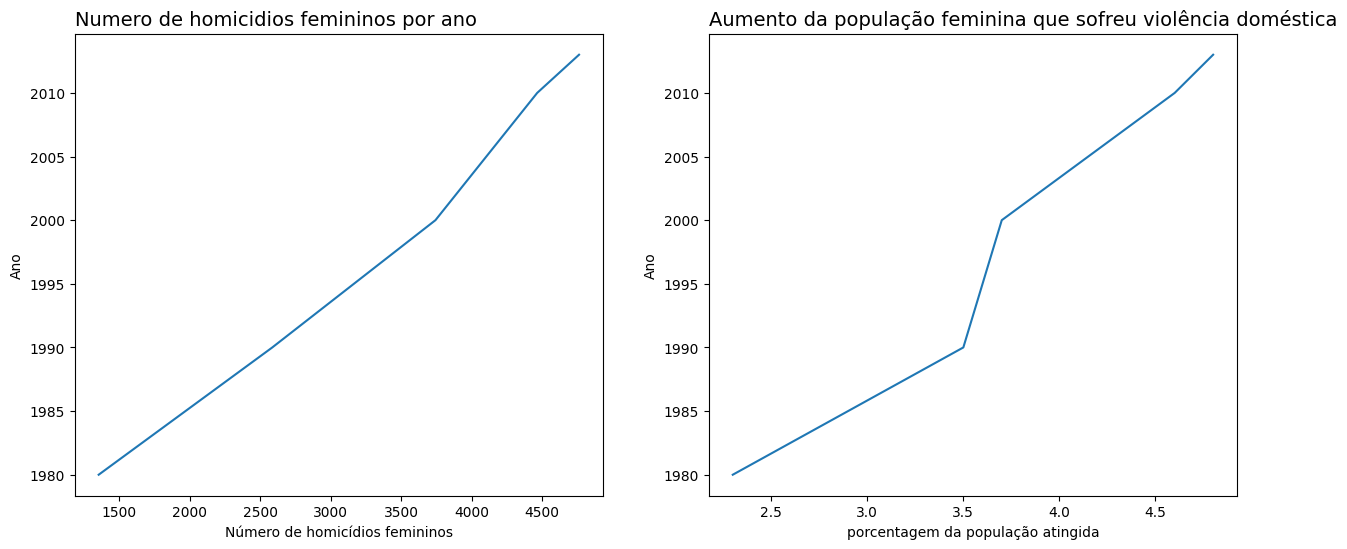

In [25]:
# Construção do gráfico de linhas para resolução do exercicio.
# Vamos construir um grid de gráficos de linhas para analisar
# os numeros de homicidios femininos e a porcentagem da população
# afetada

# Tamanho da imagem do gráfico
plt.figure(figsize=(15,6))

# Criação do primeiro subplot: terá 1 linha 2 colunas e ocupara o
# 1° espaço do grid de gráficos.
plt.subplot(1, 2, 1)

# Titulo do primeiro gráfico alinhado a esquerda e com tamanho de fonte 14
plt.title('Numero de homicidios femininos por ano', loc='left', fontsize=14)

# Criação do grafico de linhas usando a função lineplot da biblioteca seaborn: A função 
# irá receber como parametro a base de dados análisada, os valores do eixo x e os valored
# do eixo y.
sns.lineplot(data=tabelas_site[1], x='Número de homicídios femininos', y='Ano_extraido')

# Ira definir o rótulo do eixo y
plt.ylabel('Ano')

# Criação do segundo subplot: Terá 1 linha, 2 colunas e ocupara o 2° espaço
# no grid de gráficos
plt.subplot(1,2,2)

# Titulo do 2° gráfico alinhado a esquerda com tamanho da fonte 14
plt.title('Aumento da população feminina que sofreu violência doméstica', loc='left', fontsize=14)

# Criação do 2° gráfico de linhas usando a função lineplot da biblioteca seaborn:
# A função recebe como parametro a base de dados analisada, os valores do eixo x
# e os valores do eixo y.
sns.lineplot(data=tabelas_site[1], x='porcentagem_populacao', y='Ano_extraido')

# Titulo do rótulo do eixo x
plt.xlabel('porcentagem da população atingida')

# Titulo do rótulo do eixo y
plt.ylabel('Ano')

In [26]:
# Vamos utilizar uma tabela de correlação para entender melhor os dados

tabelas_site[1].corr()

,Número de homicídios femininos,Ano_extraido,porcentagem_populacao
Número de homicídios femininos,1.000000,0.994605,0.974931
Ano_extraido,0.994605,1.000000,0.978838
porcentagem_populacao,0.974931,0.978838,1.000000


Resposta do exercicio 1: Podemos observar que a violência contra a mulher foi aumentando com o passar dos tempos atingindo
uma porcentagem maior da população (cujo o máximo atingindo foi 4,8% em 2013).
Analisando a tabela de correlação:

numero de homicidios e ano: a uma forte de relação já que conforme os anos se passam a violência aumenta, mas
ainda não diz muito a motivação do crescimento.

numeros de homicidios e porcentagem da população: Possui uma forte relação, talvez podemos atribuir o aumento da população
feminina, com o aumento de casos.

ano e porcentagem de população: Possuem uma forte relação, já que conforme os anos a população atingida 
é cada vez maior.

Observação: Como estamos analisando poucas colunas, fica um pouco dificil tirar muitas conclusões sobre o tema, já que, de certa forma, nos falta algumas informações sociais, politicas, econômicas, etc.

Exercicio 2. Verifique a correlação entre a faixa etaria e a violência sofrida.

Construa gráficos que mostram a diferença em cada faixa etária. 

In [27]:
# Análisando a tabela que será utilizada nesse exercicio
tabelas_site[2].head()

Números                                           
                             Fase Mulheres  Homens Não identificados   Total
0            Crianças (0-11 anos)   20 707  17 411               130  38 248
1  Adolescentes (de 12 a 17 anos)   24 708  13 248                 9  37 965
2           Jovens (18 a 34 anos)   42 442  18 213                16  60 671
3          Adultos (34 – 59 anos)   52 979  21 264                13  74 256
4        Idosos (mais de 59 anos)    6 855   5 800                 1  12 656

In [28]:
# Analisando as informações gerais da tabela

tabelas_site[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   (Números, Fase)               6 non-null      object
 1   (Números, Mulheres)           6 non-null      object
 2   (Números, Homens)             6 non-null      object
 3   (Números, Não identificados)  6 non-null      int64 
 4   (Números, Total)              6 non-null      object
dtypes: int64(1), object(4)
memory usage: 372.0+ bytes


In [29]:
# Verificando as colunas da tabela

tabelas_site[2].columns

MultiIndex([('Números',              'Fase'),
            ('Números',          'Mulheres'),
            ('Números',            'Homens'),
            ('Números', 'Não identificados'),
            ('Números',             'Total')],
           )

In [30]:
# Vai ser necessário realizar algumas conversões de tipos, pois, a
# colunas que do tipo object que possuem valores numéricos.

# Antes de realizar as conversões, será necessário eliminar os espaços em branco dos valores
# presentes na tabela. Como estamos trabalhando com uma estrutura mais complexa que é o 
# multiIndex. Temos que acessar os dados de uma maneira diferente

# Usando a função replace para eliminar espaços em brancos

tabelas_site[2]['Números','Mulheres'] = tabelas_site[2]['Números','Mulheres'].str.replace(' ', '')

tabelas_site[2]['Números','Homens'] = tabelas_site[2]['Números','Homens'].str.replace(' ', '')

tabelas_site[2]['Números','Total'] = tabelas_site[2]['Números','Total'].str.replace(' ', '')
    
    


In [31]:
# Após a eliminação dos espaços em brancos, vamos realizar a conversão do tipo
# de dados
# Conversão usando a função do pandas to_numeric(que ira receber como 
# parametro a tabela com a coluna que deve ser convertida para o tipo
# numérico).
tabelas_site[2]['Números', 'Mulheres'] = pd.to_numeric(tabelas_site[2]['Números','Mulheres'])

# Nesse caso em especifico, estavamos enfrentando um problema de DateParseError, ou seja, era como sea função  estivesse tentando 
# interpretar o dado como uma data, logo, o to_numeric não estava 
# conseguindo converte-lo para um dado numérico. Para resolver o problema
# decidi converter de forma direta para o tipo inteiro usando o metodo astype.
tabelas_site[2]['Números','Homens'] = tabelas_site[2]['Números','Homens'].astype(int)

tabelas_site[2]['Números','Total'] = pd.to_numeric(tabelas_site[2]['Números','Total'])

In [32]:
# Verificando se as conversões de tipos funcionaram

tabelas_site[2].dtypes

Números  Fase                 object
         Mulheres              int64
         Homens                int64
         Não identificados     int64
         Total                 int64
dtype: object

In [33]:
# Visualizando a tabela após as conversões

tabelas_site[2].head()

Números                                         
                             Fase Mulheres Homens Não identificados  Total
0            Crianças (0-11 anos)    20707  17411               130  38248
1  Adolescentes (de 12 a 17 anos)    24708  13248                 9  37965
2           Jovens (18 a 34 anos)    42442  18213                16  60671
3          Adultos (34 – 59 anos)    52979  21264                13  74256
4        Idosos (mais de 59 anos)     6855   5800                 1  12656

Construção e análise dos gráficos

In [34]:

# Para facilitar o nosso trabalho na construção dos gráficos, resolvi criar um dataframe que irá facilitar a captura dos valores que irei usar em cada gráfico. 

dados = {'Mulheres':[20707, 24708, 42442, 52979, 6855], 'Homens':[17411, 13248, 18213, 21264, 5800], 'Não_identificados':[130, 9, 16, 13, 1], 'Total':[38248, 37965, 60671, 74256, 12656], 'Fase':['0-11', '12-17', '18-34', '34-59', '59+']}

df = pd.DataFrame(dados)


CONSTRUÇÃO DOS GRÁFICOS DE VIOLÊNCIA DOMÉSTICA POR GÊNERO E FAIXA ETÁRIA

Text(5, -0.5, 'Total de homens entrevistados: 75936')

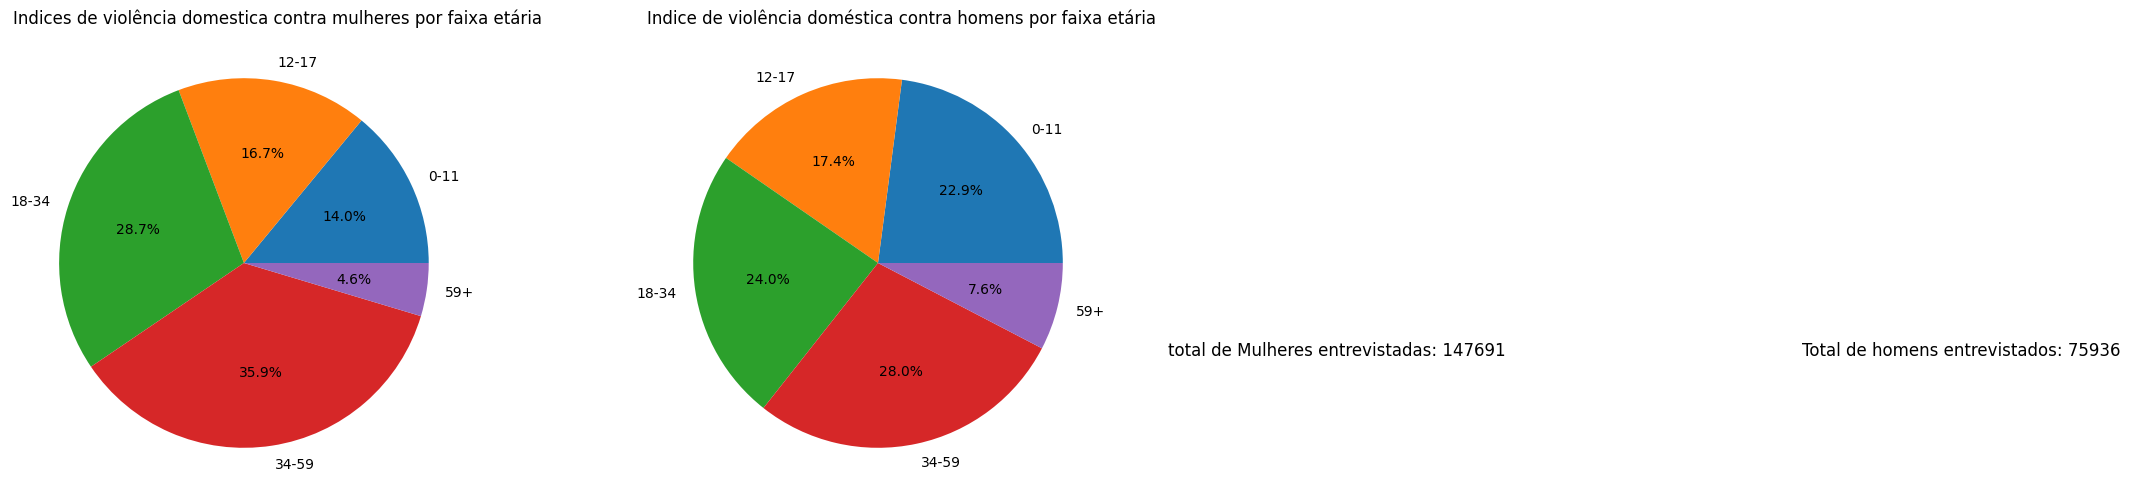

In [35]:
# Criação de um subplot que irá conter o indice de violência doméstica por faixa
# etária e genêro

# Ira definir o tamanho da imagem que irá conter os gráficos
plt.figure(figsize=(15,6))

# Criação do primeiro subplot: terá 1 linha, 2 colunas e ira ocupar o 1° espaço 
# do grid de gráficos
plt.subplot(1, 2, 1)

# Titulo do primeiro gráfico alinhado a esquerda e com tamanho da fonte 12.
plt.title('Indices de violência domestica contra mulheres por faixa etária', loc='left', fontsize=12)

# Criação do 1° gráfico de pizza: A função recebe como parametro, a base de dados
# analisada, o valor do x (valores do grafico), o labels(Rótulos de cada parte do 
# gráfico de pizza) e autopc que irá informar a porcentagem de cada valor.
plt.pie(data=df, x=df['Mulheres'], labels=df['Fase'], autopct='%1.1f%%')

# Irá conter o total de mulheres entrevistadas
total_mulheres = df['Mulheres'].sum()

# Vamos passar em formato de texto o total de mulheres entrevistadas 
# A função text do matplotlib irá receber como argumento, as coordenadas
# x e y (posição do texto), o conteudo que deve ser apresentado, o tamanho
# e a cor da fonte
plt.text(5, -0.5, f'total de Mulheres entrevistadas: {total_mulheres}' , fontsize=12, color='black' )

# Criação do segundo plot: Irá possuir 1 linha, 2 colunas e ira ocupar
# o 2° espaço no grid de gráficos
plt.subplot(1,2,2)

# Titulo do 2° gráfico alinhado a esquerda com o tamanho da fonte 12
plt.title('Indice de violência doméstica contra homens por faixa etária', loc='left', fontsize=12)

# Criação do gráfico de pizza: A função irá ter como argumento a base de dados análisada,
# o labels que será os rótulos do grafico e o autopct que irá permitir que a porcentagem
# dos valores apareça nos gráficos.
plt.pie(data=df, x=df['Homens'], labels=df['Fase'], autopct='%1.1f%%')

# Ira conter o total de homens entrevistados na pesquisa
total_homens = df['Homens'].sum()

# Agora, vamos novamente usar a função text do matploptlib para criar textos no gráfico,
# a função irá receber as coordenadas x e y (que irão posicionar o texto na imagem do
# gráfico), um texto formatado que irá conter o total de valores da coluna 'homens' 
plt.text(5, -0.5, f'Total de homens entrevistados: {total_homens}', fontsize=12, color = 'black')

                                                        ANÁLISE DO GRÁFICO DE INDICES DE VIOLENCIA POR GÊNERO E FAIXA ETÁRIA
                        EM RELAÇÃO A MULHERES

1.Em relação as mulheres a faixa etária que mais sofre violência doméstica é a faixa
entre 34 e 59 anos, tendo 35.9% dos casos registrados. 

2.As mulheres com mais de 59 anos possuem o menor indice de violência doméstica, tendo
4.6% dos casos registrados.

3.Podemos observar que a quantidade de casos registrados da faixa etaria 18-34
se apróxima da faixa dos 34-59 (grupo que possui o indice mais alto de violência
doméstica), isso indica que em grande maioria, mulheres na fase adulta tendem a 
sofrer mais violência doméstica.

4.Ao analisar os números da faixas 12-17 e 0-11 (faixas que possuem os menores indices),
podemos observar que a fase da infância e a adlescência são as que menos sofrem com a 
violência doméstica, pois, são as fases da vida que recebemos mais proteções dos familiares.
Diferente da vida adulta (faixa dos 18-34 e 34-59), onde a proteção dos amigos e familiares
diminuem.

                    EM RELAÇÃO AOS HOMENS

1.Em relação aos homens a faixa etária que mais sofre mais violência doméstica é a
faixa 34-59, tendo 28% dos casos registrados

2.Os homens com mais de 59 anos possuem o menor indice de violência doméstica,
tendo 7.6% dos casos registrados.

3.No caso dos homens, a faixa etária dos 18-34 também se aproxima da faixa
dos 34-59, isso ocorre pelos mesmos motivos retratados anteriormente (em
relação a fase adulta).

4.Nesse caso também a faixa dos 0-11 e 12-17 também possuem menos indices de 
casos registrados pelos mesmos mptivos abordados anteriormente (em relação
a fase adulta).

                COMPARAÇÃO ENTRE AS CATEGORIAS

                FÓRMULA PARA CALCULAR A DIFERENÇA PERCENTUAL

                Diferença Percentual = ((Valor Final(maior final) - Valor Inicial(menor valor)) / Valor Inicial) * 100

                RESULTADO DAS COMPARAÇÕES
                
1.Faixa dos 59+: os homens sofrem 65,21% mais violência doméstica do que os mulheres na faixa dos 59+ anos.

2.Faixa dos 34-59: as mulheres sofrem 28,21% mais violência doméstica do que os homens na 
faixa dos 34-59 anos

3.Faixa dos 18-34: As mulheres sofrem 19,58% mais violência doméstica do que os homens na
faixa dos 18-34 anos

4.Faixa dos 12-17 anos: Os homens sofrem 4,19% mais violência doméstica do que as mulheres
na faixa dos 12-17 anos.

5.Faixa dos 0-11 anos: Os homens sofrem 63,57% mais violência doméstica do que as mulheres.

Text(2, -0.5, 'Total de casos não identificados: 169')

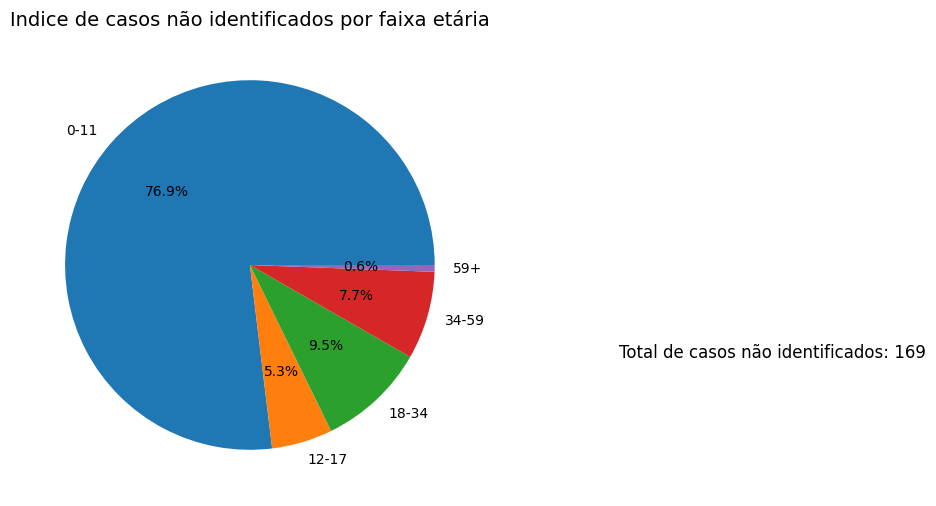

In [36]:
# Gráfico com o numero de casos não identificados por faixa etária

# Tamanho da imagem do gráfico
plt.figure(figsize=(15,6))

# Titulo do gráfico alinhado ao centro e com tamanho da fonte 12
plt.title('Indice de casos não identificados por faixa etária', loc='center', fontsize=14)

# Construção do gráfico de pizza: vamos utilizar novamente a função pie do matplotlib,
# a função terá como argumento a base de dados análisada, os valores do eixo y, os 
# rótulos de cada parte do gráfico e o autopct que ira mostrar a porcentagem dos
# valores no gráfico
plt.pie(data=df, x=df['Não_identificados'], labels=df['Fase'], autopct='%1.1f%%')

# Variável que ira conter o total de valores da coluna de não identificados
total_nao_identificados = df['Não_identificados'].sum()

# ira receber como argumeto as coordenadas x e y (para posicionar o texto na imagem), um texto
# formatado contendo o total de casos não identificados, a cor e o tamanho da fonte.
plt.text(2, -0.5, f'Total de casos não identificados: {total_nao_identificados}', color='black', fontsize=12)

                                                    ANÁLISE DO GRÁFICO DE INDICES DE CASOS NÃO IDENTIFICADOS POR FAIXA ETÁRIA

                                                    Diferença Percentual = ((Valor Final(maior final) - Valor Inicial(menor valor)) / Valor Inicial) * 100

    1. A faixa etária dos 0-11 possui o maior indice de casos não identificados, isso talvez ocorra
    por conta da pouca idade das vitimas que provavelmente não se sentem seguras para denunciar ou 
    pedir ajuda aos pais ou autoridades competentes

    2. A faixa 59+ possui o menor indice de casos não identificados, talvez
    isso ocorra por que essa faixa é a que menos sofre com a violência 
    doméstica, porém a idade avançada das vitimas também dificulta a 
    realização das denúncias por conta do medo e da insegurança.

    3. As faixas dos 18.34 possui apenas 23% a mais que a faixa dos 34-59,
    isso ocorre por que pessoas na fase de adulta são mais independentes
    e conseguem com mais facilidade realizar denuncias.

    4.A faixa dos 12-17 também representa um grupo um pouco mais independente
    que conseguem realizar de forma mais fácil denuncias.


Correlação da faixa etária com o indice de violência: Podemos observar que a relação entre a idade e o indice de violência 
é que quanto menor é a idade da vitima, mais vulneravel ela se torna e possui menos recursos de denuncias. Por exemplo, muitas
vezes a fala ou acusação de uma criança na faixa dos 0-11 anos possui menos credibilidade do que a acusação de um adulto ou
um adolescente.